# YOUTUBE VIDEOS DATA ANALYSIS

YouTube maintains a list of the top trending videos on the platform. This data set includes several months of data on daily trending YouTube videos. Data is included for the USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, India and Japan. This list is determined by using user interactions such as views, comments and likes to identify which videos are user preferred and displays them on the trending page. Ranking of these videos is done based on a ratio of views, likes, comments and shares, in order to display the best videos at the top of the page. We used the data sets available and began the process of data cleaning followed by Exploratory data analysis (EDA).

#### Our project was aimed at analyzing the daily YouTube trending videos data sets that are available here:

https://www.kaggle.com/datasnaek/youtube-new

### DATA CLEANING

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/output/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/output


In [ ]:
AllCSV = [i for i in glob.glob('*.{}'.format('csv'))]
#AllCSV = [i for i in glob.glob('*')]
AllCSV

['23.02.07_US_videos.csv',
 '23.02.07_GB_videos.csv',
 '23.02.07_IN_videos.csv',
 '23.02.07_CA_videos.csv',
 '23.02.07_FR_videos.csv',
 '23.02.07_DE_videos.csv',
 '23.02.07_KR_videos.csv',
 '23.02.07_RU_videos.csv',
 '23.02.07_JP_videos.csv',
 '23.02.07_BR_videos.csv',
 '23.02.07_MX_videos.csv']

In [ ]:
all_dataframes = [] # list to store each data frame separately
for csv in AllCSV:
    df = pd.read_csv(csv, encoding='latin-1')
    df['country'] = csv[9:11] # adding column 'country' so that each dataset could be identified uniquely
    all_dataframes.append(df)
    print(csv)

23.02.07_US_videos.csv
23.02.07_GB_videos.csv
23.02.07_IN_videos.csv
23.02.07_CA_videos.csv
23.02.07_FR_videos.csv
23.02.07_DE_videos.csv
23.02.07_KR_videos.csv
23.02.07_RU_videos.csv
23.02.07_JP_videos.csv
23.02.07_BR_videos.csv
23.02.07_MX_videos.csv


In [ ]:
all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,7_hVt4Eq0qw,I Survived On â¬0.01 For 1 Week,2023-07-01T15:00:04Z,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,23.02.07,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,False,False,1 penny. 1 week. 1 mission.donate here - https...,US
1,eFmpqhvedt8,"$50,000 Crystal Treasure Hunt",2023-07-01T14:00:00Z,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,23.02.07,dude perfect|dude perfect stereotypes|dude per...,2068126,87151,0,2212,https://i.ytimg.com/vi/eFmpqhvedt8/default.jpg,False,False,Crystal hunting ROUND 2! âº Thanks for subsc...,US
2,RlPNh_PBZb4,Olivia Rodrigo - vampire (Official Music Video),2023-06-30T04:00:08Z,UCxE5jEls-T0QtlTHT8lI1lw,OliviaRodrigoVEVO,10,23.02.07,Olivia|Rodrigo|vampire|Pop,16208517,934054,0,49068,https://i.ytimg.com/vi/RlPNh_PBZb4/default.jpg,False,False,Listen to vampire out now: https://OliviaRodri...,US
3,kes2P4IC2bQ,Juvenile: Tiny Desk Concert,2023-06-30T16:00:07Z,UC4eYXhJI4-7wSWc8UNRwD4A,NPR Music,10,23.02.07,NPR|NPR Music|National Public Radio|Live|Perfo...,1460824,105944,0,13364,https://i.ytimg.com/vi/kes2P4IC2bQ/default.jpg,False,False,NPR Music is celebrating Black Music Month wit...,US
4,RwfzvfFkyBw,Meet my Boyfriend!,2023-07-01T11:45:35Z,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,23.02.07,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,1560132,172938,0,22944,https://i.ytimg.com/vi/RwfzvfFkyBw/default.jpg,False,False,SURPRISE...the moment you all have been waitin...,US


In [ ]:
all_dataframes[0].info() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        199 non-null    object
 16  country            200 non-null    object
dt

In [ ]:
# Checking shape of all dataframes
for df in all_dataframes:
    print(df.shape)

(200, 17)
(200, 17)
(200, 17)
(200, 17)
(200, 17)
(200, 17)
(200, 17)
(174, 17)
(200, 17)
(200, 17)
(200, 17)


In [ ]:
all_dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        199 non-null    object
 16  country            200 non-null    object
dt

### Fixing Data Types
First part of the data cleaning process was to fix the data types of all the columns in order to make them easier to manipulate and be more manageable. It should be noted that for several columns the data type was changed to strings, when the data types are displayed, they show up as objects as strings are a type of object in pandas.

In [ ]:
# video_id
for df in all_dataframes:
    df['video_id'] = df['video_id'].astype('str')
print('Done')

Done


In [ ]:
all_dataframes[0].head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,7_hVt4Eq0qw,I Survived On â¬0.01 For 1 Week,2023-07-01T15:00:04Z,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,23.02.07,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,False,False,1 penny. 1 week. 1 mission.donate here - https...,US
1,eFmpqhvedt8,"$50,000 Crystal Treasure Hunt",2023-07-01T14:00:00Z,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,23.02.07,dude perfect|dude perfect stereotypes|dude per...,2068126,87151,0,2212,https://i.ytimg.com/vi/eFmpqhvedt8/default.jpg,False,False,Crystal hunting ROUND 2! âº Thanks for subsc...,US
2,RlPNh_PBZb4,Olivia Rodrigo - vampire (Official Music Video),2023-06-30T04:00:08Z,UCxE5jEls-T0QtlTHT8lI1lw,OliviaRodrigoVEVO,10,23.02.07,Olivia|Rodrigo|vampire|Pop,16208517,934054,0,49068,https://i.ytimg.com/vi/RlPNh_PBZb4/default.jpg,False,False,Listen to vampire out now: https://OliviaRodri...,US
3,kes2P4IC2bQ,Juvenile: Tiny Desk Concert,2023-06-30T16:00:07Z,UC4eYXhJI4-7wSWc8UNRwD4A,NPR Music,10,23.02.07,NPR|NPR Music|National Public Radio|Live|Perfo...,1460824,105944,0,13364,https://i.ytimg.com/vi/kes2P4IC2bQ/default.jpg,False,False,NPR Music is celebrating Black Music Month wit...,US
4,RwfzvfFkyBw,Meet my Boyfriend!,2023-07-01T11:45:35Z,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,23.02.07,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,1560132,172938,0,22944,https://i.ytimg.com/vi/RwfzvfFkyBw/default.jpg,False,False,SURPRISE...the moment you all have been waitin...,US


In [ ]:
# trending date is in object format so we need to convert it
for df in all_dataframes:
    df['trending_date'] = df['trending_date'].astype('str')
    date_pieces = (df['trending_date']
                   .str.split('.') )
    df['Year'] = date_pieces.str[0].astype(int) + 2000
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    df['trending_date'] = pd.to_datetime(df[['Day','Month','Year']]).dt.strftime('%d/%m/%Y')
    del df['Year']
    del df['Day']
    del df['Month']
print('Done')

Done


In [ ]:
all_dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        199 non-null    object
 16  country            200 non-null    object
dt

In [ ]:
all_dataframes[0].head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,7_hVt4Eq0qw,I Survived On â¬0.01 For 1 Week,2023-07-01T15:00:04Z,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,02/07/2023,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,False,False,1 penny. 1 week. 1 mission.donate here - https...,US
1,eFmpqhvedt8,"$50,000 Crystal Treasure Hunt",2023-07-01T14:00:00Z,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,02/07/2023,dude perfect|dude perfect stereotypes|dude per...,2068126,87151,0,2212,https://i.ytimg.com/vi/eFmpqhvedt8/default.jpg,False,False,Crystal hunting ROUND 2! âº Thanks for subsc...,US
2,RlPNh_PBZb4,Olivia Rodrigo - vampire (Official Music Video),2023-06-30T04:00:08Z,UCxE5jEls-T0QtlTHT8lI1lw,OliviaRodrigoVEVO,10,02/07/2023,Olivia|Rodrigo|vampire|Pop,16208517,934054,0,49068,https://i.ytimg.com/vi/RlPNh_PBZb4/default.jpg,False,False,Listen to vampire out now: https://OliviaRodri...,US
3,kes2P4IC2bQ,Juvenile: Tiny Desk Concert,2023-06-30T16:00:07Z,UC4eYXhJI4-7wSWc8UNRwD4A,NPR Music,10,02/07/2023,NPR|NPR Music|National Public Radio|Live|Perfo...,1460824,105944,0,13364,https://i.ytimg.com/vi/kes2P4IC2bQ/default.jpg,False,False,NPR Music is celebrating Black Music Month wit...,US
4,RwfzvfFkyBw,Meet my Boyfriend!,2023-07-01T11:45:35Z,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,02/07/2023,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,1560132,172938,0,22944,https://i.ytimg.com/vi/RwfzvfFkyBw/default.jpg,False,False,SURPRISE...the moment you all have been waitin...,US


In [ ]:
#Separating ‘publishedAt’ into ‘publish_date’ and ‘publish_time’
for df in all_dataframes:
    df.insert(3, 'publish_date', pd.to_datetime(df['publishedAt'],errors='coerce').dt.strftime('%d/%m/%Y') ) # loc, column name, values for column to be inserted
    df.insert(4, 'publish_time', pd.to_datetime(df['publishedAt']).dt.time)
    #df["publish_date"] = df["publish_date"].dt.strftime('%d/%m/%Y').astype('datetime64[ns]' ,errors = 'ignore')
    del df['publishedAt']
print('Done')

Done


In [ ]:
all_dataframes[0].head()

,video_id,title,publish_date,publish_time,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,7_hVt4Eq0qw,I Survived On â¬0.01 For 1 Week,01/07/2023,15:00:04,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,02/07/2023,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,False,False,1 penny. 1 week. 1 mission.donate here - https...,US
1,eFmpqhvedt8,"$50,000 Crystal Treasure Hunt",01/07/2023,14:00:00,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,17,02/07/2023,dude perfect|dude perfect stereotypes|dude per...,2068126,87151,0,2212,https://i.ytimg.com/vi/eFmpqhvedt8/default.jpg,False,False,Crystal hunting ROUND 2! âº Thanks for subsc...,US
2,RlPNh_PBZb4,Olivia Rodrigo - vampire (Official Music Video),30/06/2023,04:00:08,UCxE5jEls-T0QtlTHT8lI1lw,OliviaRodrigoVEVO,10,02/07/2023,Olivia|Rodrigo|vampire|Pop,16208517,934054,0,49068,https://i.ytimg.com/vi/RlPNh_PBZb4/default.jpg,False,False,Listen to vampire out now: https://OliviaRodri...,US
3,kes2P4IC2bQ,Juvenile: Tiny Desk Concert,30/06/2023,16:00:07,UC4eYXhJI4-7wSWc8UNRwD4A,NPR Music,10,02/07/2023,NPR|NPR Music|National Public Radio|Live|Perfo...,1460824,105944,0,13364,https://i.ytimg.com/vi/kes2P4IC2bQ/default.jpg,False,False,NPR Music is celebrating Black Music Month wit...,US
4,RwfzvfFkyBw,Meet my Boyfriend!,01/07/2023,11:45:35,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,02/07/2023,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,1560132,172938,0,22944,https://i.ytimg.com/vi/RwfzvfFkyBw/default.jpg,False,False,SURPRISE...the moment you all have been waitin...,US


In [ ]:
for df in all_dataframes:
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channelTitle'].astype('str')
    del df['channelTitle']
    #category_id
    df['category_id'] = df['categoryId'].astype(str)
    del df['categoryId']
    #tags
    df['tags'] = df['tags'].astype('str')
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str')
    #description
    df['description'] = df['description'].astype('str')
print('Done')

Done


In [ ]:
all_dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publish_date       200 non-null    object
 3   publish_time       200 non-null    object
 4   channelId          200 non-null    object
 5   trending_date      200 non-null    object
 6   tags               200 non-null    object
 7   view_count         200 non-null    int64 
 8   likes              200 non-null    int64 
 9   dislikes           200 non-null    int64 
 10  comment_count      200 non-null    int64 
 11  thumbnail_link     200 non-null    object
 12  comments_disabled  200 non-null    bool  
 13  ratings_disabled   200 non-null    bool  
 14  description        200 non-null    object
 15  country            200 non-null    object
 16  channel_title      200 non-null    object
 1

**views, likes, dislikes, comment_count are already in correct data types i.e int64**

In [ ]:
all_dataframes[0].head()

,video_id,title,publish_date,publish_time,channelId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,channel_title,category_id
0,7_hVt4Eq0qw,I Survived On â¬0.01 For 1 Week,01/07/2023,15:00:04,UCnmGIkw-KdI0W5siakKPKog,02/07/2023,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,False,False,1 penny. 1 week. 1 mission.donate here - https...,US,Ryan Trahan,24
1,eFmpqhvedt8,"$50,000 Crystal Treasure Hunt",01/07/2023,14:00:00,UCRijo3ddMTht_IHyNSNXpNQ,02/07/2023,dude perfect|dude perfect stereotypes|dude per...,2068126,87151,0,2212,https://i.ytimg.com/vi/eFmpqhvedt8/default.jpg,False,False,Crystal hunting ROUND 2! âº Thanks for subsc...,US,Dude Perfect,17
2,RlPNh_PBZb4,Olivia Rodrigo - vampire (Official Music Video),30/06/2023,04:00:08,UCxE5jEls-T0QtlTHT8lI1lw,02/07/2023,Olivia|Rodrigo|vampire|Pop,16208517,934054,0,49068,https://i.ytimg.com/vi/RlPNh_PBZb4/default.jpg,False,False,Listen to vampire out now: https://OliviaRodri...,US,OliviaRodrigoVEVO,10
3,kes2P4IC2bQ,Juvenile: Tiny Desk Concert,30/06/2023,16:00:07,UC4eYXhJI4-7wSWc8UNRwD4A,02/07/2023,NPR|NPR Music|National Public Radio|Live|Perfo...,1460824,105944,0,13364,https://i.ytimg.com/vi/kes2P4IC2bQ/default.jpg,False,False,NPR Music is celebrating Black Music Month wit...,US,NPR Music,10
4,RwfzvfFkyBw,Meet my Boyfriend!,01/07/2023,11:45:35,UCSGoIq_tVESqNYF1Re-zn1Q,02/07/2023,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,1560132,172938,0,22944,https://i.ytimg.com/vi/RwfzvfFkyBw/default.jpg,False,False,SURPRISE...the moment you all have been waitin...,US,HJ Evelyn,24


In [ ]:
all_dataframes[0].comments_disabled.value_counts()

False    198
True       2
Name: comments_disabled, dtype: int64

In [ ]:
for df in all_dataframes:
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to int
    df['comments_disabled'] = df['comments_disabled'].apply(lambda x : 0 if x == False else 1)
    df['ratings_disabled'] = df['ratings_disabled'].apply(lambda x : 0 if x == False else 1)
print('Done')

Done


In [ ]:
all_dataframes[0].comments_disabled.value_counts()

0    198
1      2
Name: comments_disabled, dtype: int64

In [ ]:
#Let's check at the dataframe after correcting all data types
all_dataframes[0].head()

,video_id,title,publish_date,publish_time,channelId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,channel_title,category_id
0,7_hVt4Eq0qw,I Survived On â¬0.01 For 1 Week,01/07/2023,15:00:04,UCnmGIkw-KdI0W5siakKPKog,02/07/2023,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,0,0,1 penny. 1 week. 1 mission.donate here - https...,US,Ryan Trahan,24
1,eFmpqhvedt8,"$50,000 Crystal Treasure Hunt",01/07/2023,14:00:00,UCRijo3ddMTht_IHyNSNXpNQ,02/07/2023,dude perfect|dude perfect stereotypes|dude per...,2068126,87151,0,2212,https://i.ytimg.com/vi/eFmpqhvedt8/default.jpg,0,0,Crystal hunting ROUND 2! âº Thanks for subsc...,US,Dude Perfect,17
2,RlPNh_PBZb4,Olivia Rodrigo - vampire (Official Music Video),30/06/2023,04:00:08,UCxE5jEls-T0QtlTHT8lI1lw,02/07/2023,Olivia|Rodrigo|vampire|Pop,16208517,934054,0,49068,https://i.ytimg.com/vi/RlPNh_PBZb4/default.jpg,0,0,Listen to vampire out now: https://OliviaRodri...,US,OliviaRodrigoVEVO,10
3,kes2P4IC2bQ,Juvenile: Tiny Desk Concert,30/06/2023,16:00:07,UC4eYXhJI4-7wSWc8UNRwD4A,02/07/2023,NPR|NPR Music|National Public Radio|Live|Perfo...,1460824,105944,0,13364,https://i.ytimg.com/vi/kes2P4IC2bQ/default.jpg,0,0,NPR Music is celebrating Black Music Month wit...,US,NPR Music,10
4,RwfzvfFkyBw,Meet my Boyfriend!,01/07/2023,11:45:35,UCSGoIq_tVESqNYF1Re-zn1Q,02/07/2023,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,1560132,172938,0,22944,https://i.ytimg.com/vi/RwfzvfFkyBw/default.jpg,0,0,SURPRISE...the moment you all have been waitin...,US,HJ Evelyn,24


### Checking for Missing Values

In [ ]:
for df in all_dataframes:
    print(df.isnull().sum() > 0)

video_id             False
title                False
publish_date         False
publish_time         False
channelId            False
trending_date        False
tags                 False
view_count           False
likes                False
dislikes             False
comment_count        False
thumbnail_link       False
comments_disabled    False
ratings_disabled     False
description          False
country              False
channel_title        False
category_id          False
dtype: bool
video_id             False
title                False
publish_date         False
publish_time         False
channelId            False
trending_date        False
tags                 False
view_count           False
likes                False
dislikes             False
comment_count        False
thumbnail_link       False
comments_disabled    False
ratings_disabled     False
description          False
country              False
channel_title        False
category_id          False
dtype: bool
vide

#### No data set had any missing values, thus there was no handling necessary.

## Data Handeling

**As our all datasets are cleaned, we can combine it in a one dataframe in order to perform EDA**

In [ ]:
combined_df = pd.concat(all_dataframes)
combined_df.shape

(2174, 18)

In [ ]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

In [ ]:
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

In [ ]:
combined_df['country'].value_counts()

KR    200
JP    198
IN    198
BR    191
MX    189
FR    180
RU    173
DE    172
GB    138
US    115
CA     46
Name: country, dtype: int64

In [ ]:
combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
7_hVt4Eq0qw,01/07/2023,15:00:04,02/07/2023,US
CixPfEpTXfo,01/07/2023,08:19:52,02/07/2023,RU
rb2h0XG7VY8,01/07/2023,11:17:48,02/07/2023,RU
vSlNQHmneE0,01/07/2023,15:38:42,02/07/2023,RU
c944O4i5gp4,30/06/2023,14:25:09,02/07/2023,RU


### Inserting Category Column
One of our final steps for the data cleaning of the data sets was checking the JSON files that were available with the data sets. We needed to see whether or not these files contained any useful data.

In [ ]:
# read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

JSON file contains id ranging from 1 to 44 (both inclusive). And with each id is given its category and other information related to title, kind etc. Hence, we can use JSON files to map category to category id in our data frame.

In [ ]:
category_id = {}
with open('US_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)

,index,title,category,publish_date,publish_time,channelId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,channel_title,category_id
video_id,,,,,,,,,,,,,,,,,,,
7_hVt4Eq0qw,0,I Survived On â¬0.01 For 1 Week,Entertainment,01/07/2023,15:00:04,UCnmGIkw-KdI0W5siakKPKog,02/07/2023,Ryan|Trahan|penny|challenge|europe|euro|I surv...,3066252,240516,0,25706,https://i.ytimg.com/vi/7_hVt4Eq0qw/default.jpg,0,0,1 penny. 1 week. 1 mission.donate here - https...,US,Ryan Trahan,24
CixPfEpTXfo,44,ÐÐ°Ðº ÐÐ£ÐÐÐ¨ÐÐÐÐ ÑÐ¿Ð°Ñ ÑÐ¾ÑÑÐ¸Ñ...,Comedy,01/07/2023,08:19:52,UCwDF_86MbmsQp7cBtgIflJg,02/07/2023,Ð®ÑÐ¸Ð¹ ÐÐµÐ»Ð¸ÐºÐ¸Ð¹|Ð®ÑÑÐ¹ ÐÐµÐ»Ð¸ÐºÐ¸Ð...,936674,65771,0,3017,https://i.ytimg.com/vi/CixPfEpTXfo/default.jpg,0,0,Ð¡Ð°Ð¼Ð¾Ð¿ÑÐ¾Ð²Ð¾Ð·Ð³Ð»Ð°ÑÑÐ½Ð½ÑÐ¹ Ð¿ÑÐµÐ...,RU,Ð®ÑÐ¸Ð¹ ÐÐÐÐÐÐÐ,23
rb2h0XG7VY8,58,3 Ð­Ð¢ÐÐ RDS GP 2023 â Ð¢Ð ÐÐÐ¡ÐÐ¯Ð¦ÐÐ...,Sports,01/07/2023,11:17:48,UCiyFWXStxJUooYLqD359h-A,02/07/2023,rds|drift|ÑÐ´Ñ|Ð´ÑÐ¸ÑÑ|ÑÐ¾ÑÑÐ¸Ð¹ÑÐºÐ°...,123417,3061,0,39,https://i.ytimg.com/vi/rb2h0XG7VY8/default.jpg,0,0,â¡ï¸ Ð¢ÑÐ°Ð½ÑÐ»ÑÑÐ¸Ñ Ð¢ÐÐ 32 Ð£ÐÐ Ð...,RU,Ð Ð¾ÑÑÐ¸Ð¹ÑÐºÐ°Ñ ÐÑÐ¸ÑÑ Ð¡ÐµÑÐ¸Ñ RDS,17


In [ ]:
combined_df['category'].unique()

array(['Entertainment', 'Comedy', 'Sports', 'Gaming', 'Music',
       'People & Blogs', 'News & Politics', 'Autos & Vehicles',
       'Education', 'Pets & Animals', 'Film & Animation', 'Howto & Style',
       'Travel & Events', 'Nonprofits & Activism', 'Science & Technology'],
      dtype=object)

Thus, we cleaned up and refined our data sets into a finalized data frame, ready to be used for the upcoming EDA section of the project. We pickled both the finalized data frame and a copy of the original cleaned data frame into files, ready for use.

## Exploratory Data Analysis

We began by looking at the ratio of likes and dislikes on a trending video, depending on the category. The higher the ratio, the more the content of the video was liked by the users. As you can see from the resulting output below:

<Axes: xlabel='category'>

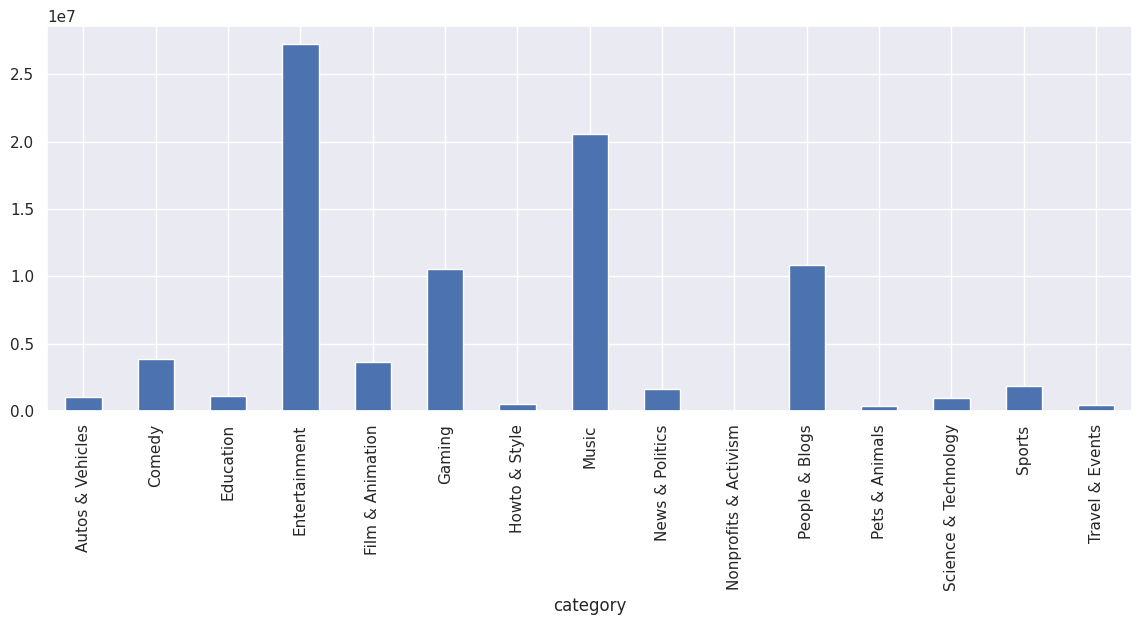

In [ ]:
# calculating total likes for each category
plt.figure(figsize = [14,5])
combined_df.groupby('category')['likes'].agg('sum').plot(kind = 'bar')

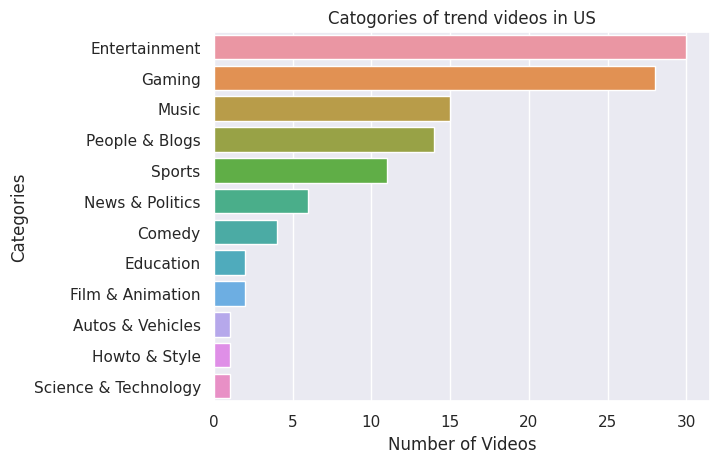

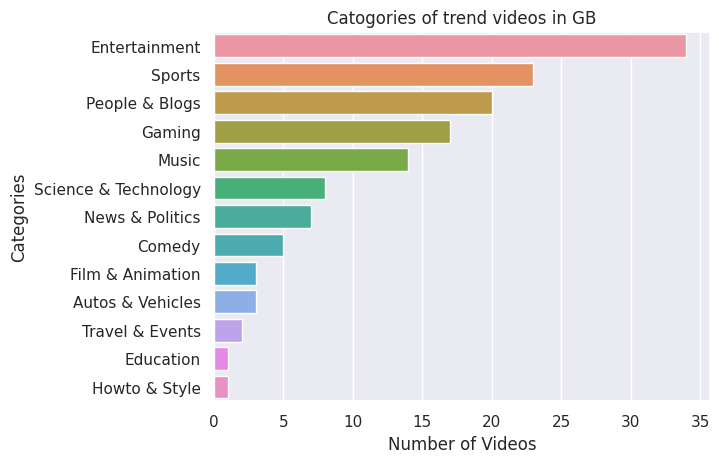

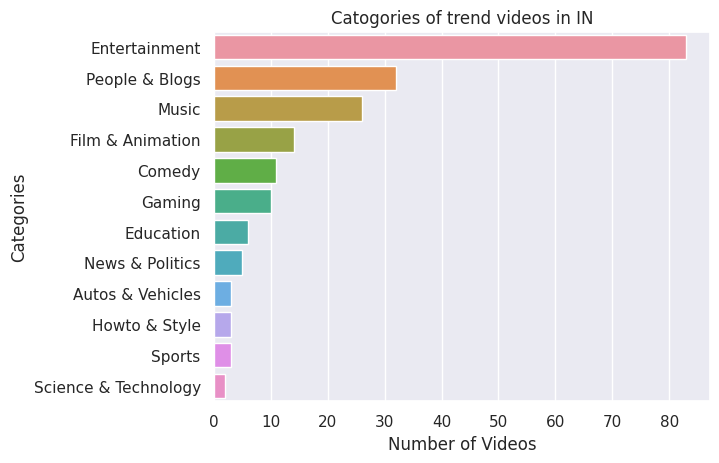

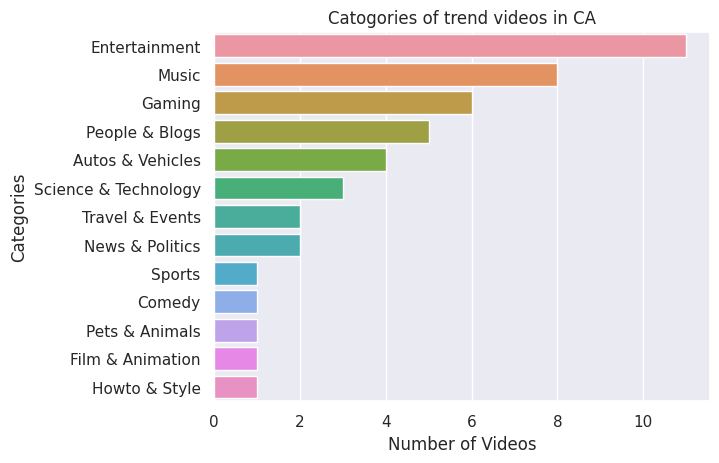

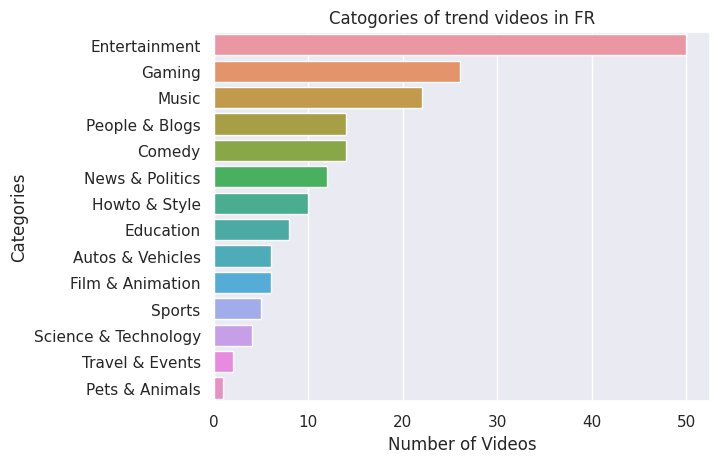

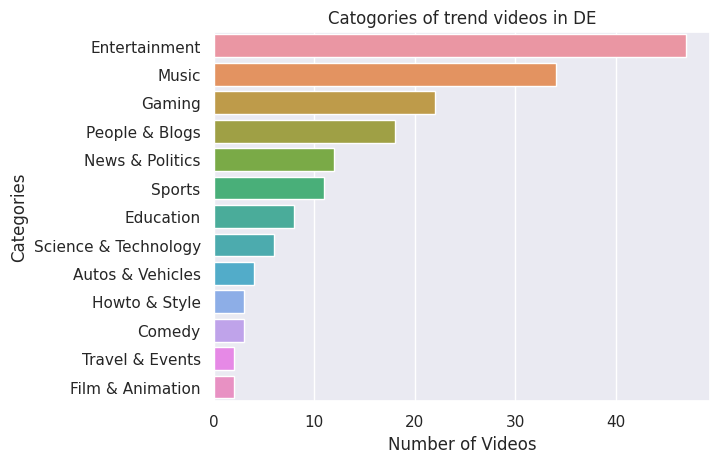

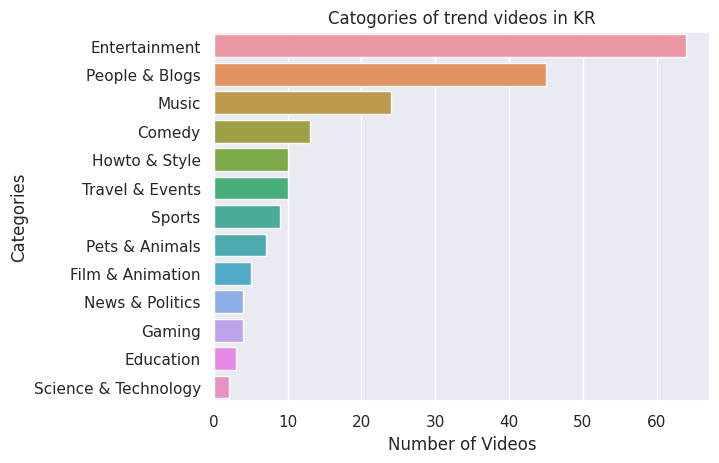

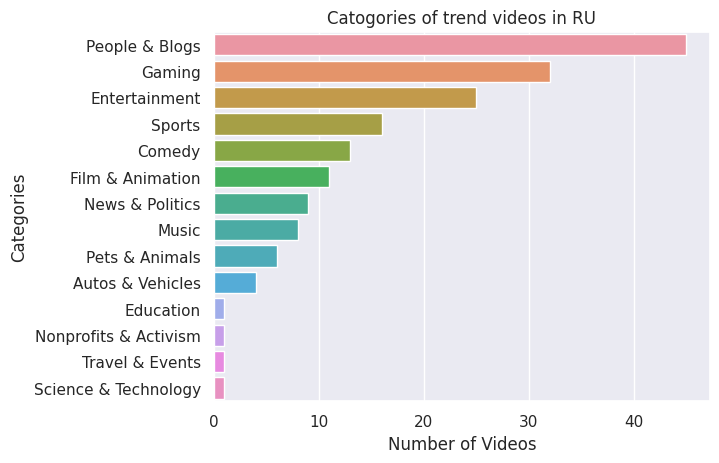

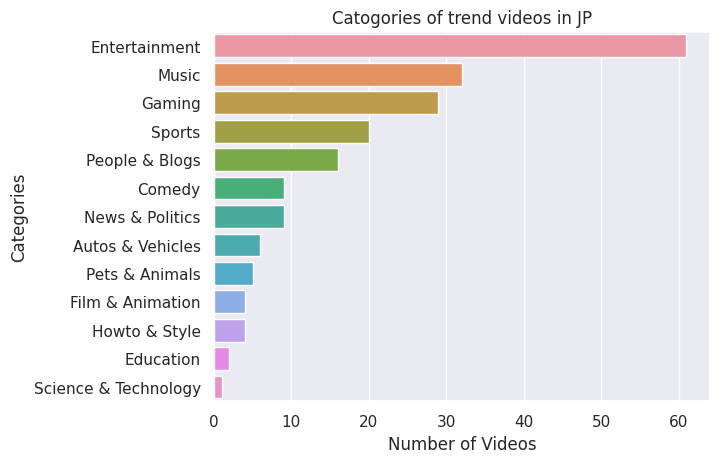

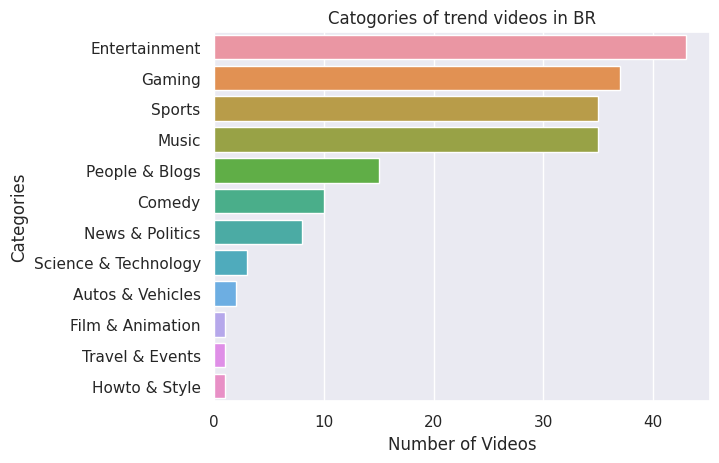

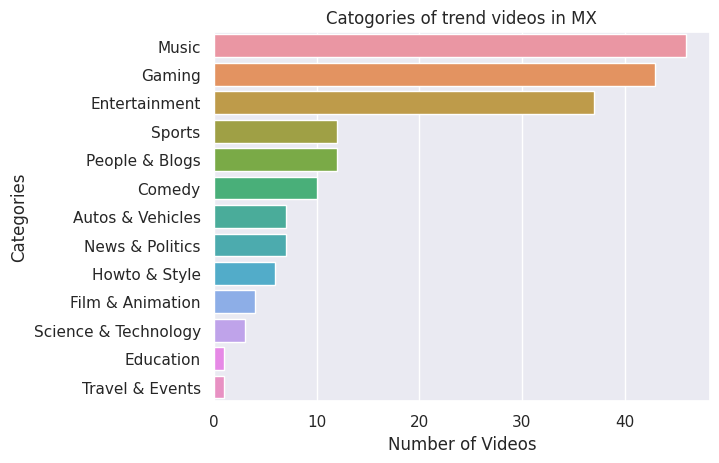

<Figure size 640x480 with 0 Axes>

In [ ]:
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[9:11]
    countries.append(c)
for country in countries:
  tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
  ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
  plt.xlabel("Number of Videos")
  plt.ylabel("Categories")
  plt.title("Catogories of trend videos in " + country)
  plt.figure()

